In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import os
os.chdir("/content/drive/MyDrive/YoloTrOCR")
!pwd

/content/drive/.shortcut-targets-by-id/1YoAqqLnGr6U9B2f1qTqr3J-Kb2VAm4Ip/YoloTrOCR


In [ ]:
!ls

aakritti_handwritten.jpg  images	   models	    report.JPG		 txt
bboxes_image.jpg	  main.py	   __pycache__	    text_detection.py
DocLayout.ipynb		  model_doclayout  report_good.JPG  text_recognition.py


In [ ]:
# !pip install paddlepaddle-gpu
# !pip install paddleocr


In [ ]:
!pip install ultralytics

In [ ]:

import os
# os.environ["GRADIO_TEMP_DIR"] = "./tmp"

import sys
import torch
import torchvision

import numpy as np
from PIL import Image
from huggingface_hub import snapshot_download
# from visualization import visualize_bbox

In [ ]:
! pip install doclayout_yolo

In [ ]:
import os
import shutil

def delete_all_files_in_folder(folder_path):
    if os.path.exists(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                if os.path.isdir(file_path):
                    shutil.rmtree(file_path)
                else:
                    # Remove file
                    os.remove(file_path)
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")
        print(f"All files and subdirectories in '{folder_path}' have been deleted.")
    else:
        print(f"The folder {folder_path} does not exist.")

folder_paths =[ "/content/drive/MyDrive/YoloTrOCR/images/original"  ,"/content/drive/MyDrive/YoloTrOCR/images/resized"]
for folder_path in folder_paths:
  delete_all_files_in_folder(folder_path)


All files and subdirectories in '/content/drive/MyDrive/YoloTrOCR/images/original' have been deleted.
All files and subdirectories in '/content/drive/MyDrive/YoloTrOCR/images/resized' have been deleted.


In [ ]:
import os
from text_detection import *
from text_recognition import *
from Doclayout_yolo import *

In [ ]:
model_dir=os.path.join(root_path, "model_doclayout", "DocLayout-YOLO-DocStructBench", "doclayout_yolo_docstructbench_imgsz1024.pt")
img_path=os.path.join(root_path,"aakritti_handwritten.jpg")

doclayout_yolo=Doclayoutyolo(model_dir,img_path)
doclayout_yolo.crop_images()


0: 1024x672 3 plain texts, 1 abandon, 1 figure, 2 isolate_formulas, 111.0ms
Speed: 5.8ms preprocess, 111.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 672)
plain_text
isolate_formula
plain_text
abandon
figure
isolate_formula


In [ ]:
'''for paddleOCr'''

# from paddleocr import PaddleOCR, draw_ocr
# import cv2
# from matplotlib import pyplot as plt

# # Initialize PaddleOCR
# ocr = PaddleOCR(use_angle_cls=True, lang='en')  # Set 'ch' for Chinese

# file_path = root_path
# OG_IMG_DIR = os.path.join(file_path,  'images', 'original')
# TEXT_FILE_DIR = os.path.join(file_path, 'txt')
# with open(os.path.join(TEXT_FILE_DIR, "predicted_test.txt"), 'w') as file:
#     pass

# # Read the image
# def pipeline_function(img_file):
#   image_path = os.path.join(OG_IMG_DIR,img_file)
#   image = cv2.imread(image_path)

#   # Perform OCR
#   results = ocr.ocr(image_path, cls=True)

#   # Print results
#   with open(os.path.join(TEXT_FILE_DIR, "predicted_test.txt"), 'a') as file:
#     for line in results[0]:
#       file.write(f"Text: {line[1][0]}, Confidence: {line[1][1]:.2f}\n")


# input_path=[]
# if __name__ == "__main__":
#   for image_path in os.listdir(OG_IMG_DIR):
#     if image_path.endswith('.jpg'):
#       input_path.append(image_path)
#       pipeline_function(img_file=image_path)
# #   boxes = [line[0] for line in results[0]]
# #   texts = [line[1][0] for line in results[0]]
# #   scores = [line[1][1] for line in results[0]]

# #   # Draw the results on the image
# #   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# #   result_image = draw_ocr(image, boxes, texts, scores)

# # # Display the result
# # plt.figure(figsize=(10, 10))
# # plt.imshow(result_image)
# # plt.axis('off')
# # plt.show()


'for paddleOCr'

In [ ]:


file_path = root_path
OG_IMG_DIR = os.path.join(file_path,  'images', 'original')
RESIZED_IMG_DIR = os.path.join(file_path, 'images', 'resized')


TEXT_FILE_DIR = os.path.join(file_path, 'txt')
with open(os.path.join(TEXT_FILE_DIR, "predicted_test.txt"), 'w') as file:
    pass

def pipeline_function(img_file):
    """
    Detect texts on the provided document, resize the and generate respective text and saves into .txt file
    :param img_file: Path of document
    :return:
    """
    text_det_obj = TextDetection(image_file=img_file)
    text_rec_obj = TextRecognition()
    key=img_file.split('_')[0]

    _, cropped_images_file_name = text_det_obj.return_cropped_images()

    texts = []
    for cropped_image in cropped_images_file_name:
        generated_text = text_rec_obj.return_generated_text(image_path=os.path.join(RESIZED_IMG_DIR, cropped_image))
        if generated_text is None:
          print(f'No text detected in {img_file}')
          continue
        texts.append(generated_text)

    out_text='\t'.join(texts)
    with open(os.path.join(TEXT_FILE_DIR, "predicted_test.txt"), 'a') as file:
        file.write(f'{key}:{out_text}\n\n')


input_path=[]
if __name__ == "__main__":
  for image_path in os.listdir(OG_IMG_DIR):
    if image_path.endswith('.jpg'):
      input_path.append(image_path)
      pipeline_function(img_file=image_path)

# filters for preprocessing

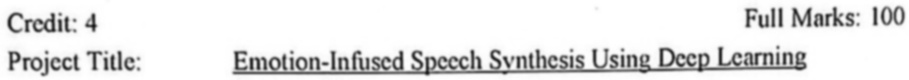

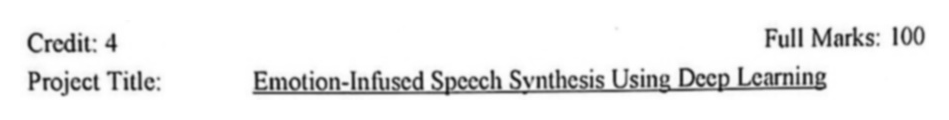

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load image
image = cv2.imread('/content/drive/MyDrive/YoloTrOCR/images/original/plain text_7.jpg', cv2.IMREAD_GRAYSCALE)

cv2_imshow(image)
# Padding parameters
top, bottom, left, right = 20, 20, 20, 20 # Padding sizes
border_color = (255, 255, 255)  # Blue color in BGR

# Add padding
padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=border_color)

# Display the result
cv2_imshow(padded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



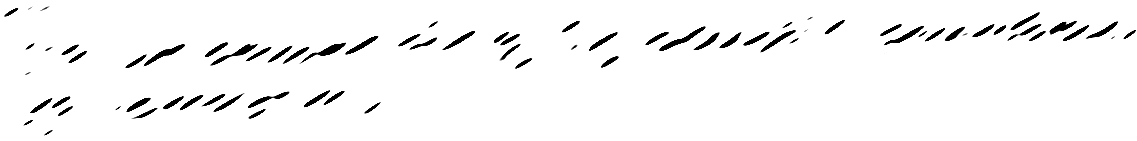

In [ ]:
def gabor_filter(image, kernel_size, sigma, theta, lambd, gamma, psi):
    kernel = cv2.getGaborKernel((kernel_size, kernel_size), sigma, theta, lambd, gamma, psi)
    filtered_image = cv2.filter2D(image, cv2.CV_32F, kernel)
    return filtered_image

# Parameters for Gabor filter
theta = 1  # Orientation of the filter
gabor_result = gabor_filter(image, 31, 4.0, theta, 10.0, 0.5, 0)

# Show the result
cv2_imshow(gabor_result)
cv2.waitKey(0)
cv2.destroyAllWindows()


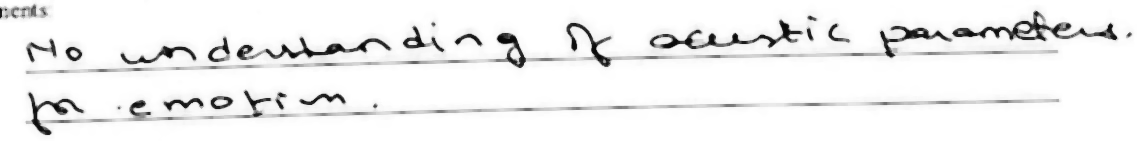

In [ ]:
# Apply Median Filter
median_filtered_image = cv2.medianBlur(image, 5)  # Kernel size = 5

# Show the result
cv2_imshow( median_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# use paddleOCR

In [ ]:
import cv2
from PIL import Image, ImageDraw, ImageFont

def draw_ocr2(image, boxes, texts, scores, font_path='arial.ttf', font_size=20):
    """
    Draws OCR results on an image.

    Parameters:
    - image: The input image on which to draw.
    - boxes: A list of bounding boxes for the detected text.
    - texts: A list of detected text strings.
    - scores: A list of confidence scores for each detected text.
    - font_path: Path to the TrueType font file.
    - font_size: Size of the font.

    Returns:
    - image_with_ocr: The image with drawn OCR results.
    """
    # Convert the image to a PIL image
    pil_image = Image.fromarray(image)
    draw = ImageDraw.Draw(pil_image)

    try:
        # Load the font
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        # Fallback font if custom font cannot be loaded
        print("Custom font not found. Using default font.")
        font = ImageFont.load_default()

    # Iterate through each detected text box
    for (box, text, score) in zip(boxes, texts, scores):
        # Draw the bounding box
        draw.rectangle(box, outline="red", width=2)
        # Prepare the text with its confidence score
        display_text = f'{text} ({score:.2f})'
        # Draw the text
        draw.text((box[0][0], box[0][1]), display_text, fill="blue", font=font)

    # Convert the PIL image back to a NumPy array (OpenCV format)
    image_with_ocr = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

    return image_with_ocr


In [ ]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
from matplotlib import pyplot as plt


ocr = PaddleOCR(use_angle_cls=True, lang='en')  # Set 'ch' for Chinese

# Read the image
image_path = '/content/drive/MyDrive/YoloTrOCR/report.JPG'
image = cv2.imread(image_path)

# Perform OCR
results = ocr.ocr(image_path, cls=True)

# Print results
for line in results[0]:
    print(f"{line[1][0]}\n")

# # # Visualize results
# # # Extract boxes, text, and scores
# boxes = [line[0] for line in results[0]]
# texts = [line[1][0] for line in results[0]]
# scores = [line[1][1] for line in results[0]]

# # Draw the results on the image
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# result_image = draw_ocr(image, boxes, texts, scores, font_path='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf')


# # Display the result
# plt.figure(figsize=(10, 10))
# plt.imshow(result_image)
# plt.axis('off')
# plt.show()


[2025/01/16 19:14:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

In [ ]:
!apt-get install -y fonts-dejavu
!fc-cache -fv

# playing with yolo

In [ ]:
from ultralytics import YOLO
from huggingface_hub import hf_hub_download
from matplotlib import pyplot as plt

# Load the weights from our repository
model_path = hf_hub_download(local_dir=".",
                             repo_id="armvectores/yolov8n_handwritten_text_detection",
                             filename="best.pt")
model = YOLO(model_path)


# Specify the image path
image_path = "/content/figure_1.jpg"  # Replace with your image path

# Perform prediction
results = model.predict(
    source=image_path,
    project='.',
    name='detected',
    exist_ok=True,
    save=True,
    show=False,
    show_labels=False,
    show_conf=False,
    conf=0.2
)

# Display the result


In [ ]:
detected_image_path = '/content/detected/figure_1.jpg'  # Update based on the output name
plt.figure(figsize=(15, 10))
plt.imshow(plt.imread(detected_image_path))
plt.axis('off')
plt.show()



DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow
